In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.colors import BoundaryNorm
from cartopy.util import add_cyclic_point
from plot_CAT_function import *
import cmaps
import areamean_dhq as dhq
from scipy import stats
from scipy.stats import pearsonr
import cartopy.feature as cfeature
ccmap = cmaps.NEO_div_vegetation_a
plt.rcParams['font.family'] = 'Helvetica'

In [2]:
#2. 读取monthly的u数据
IN_DIR='/home/share-to-3/dongyl/cmip_mon/h+ssp585_remapbil_289x145'
u_1980_2010_ay = []
u_2060_2090_ay = []
models_list = ["BCC-CSM2-MR", "CanESM5", "CESM2-WACCM","FGOALS-g3","IITM-ESM",
          "KACE-1-0-G",'INM-CM5-0',"IPSL-CM6A-LR","MIROC6", "MPI-ESM1-2-HR",
          "MRI-ESM2-0","NorESM2-LM","NorESM2-MM","TaiESM1"]#"INM-CM4-8",
for model in models_list:
    print(f"Processing model, ua, {model}")
    u_mon = xr.open_dataset(f'{IN_DIR}/ua_h+ssp585_{model}_r1i1p1f1_197901-209912_289x145.nc')

    u_1980_2010 = u_mon.sel(lat=slice(10,80))#time=slice('1980-01-01','2010-12-31'),
    u_2060_2090 = u_mon.sel(lat=slice(10,80))
    u_hist = u_1980_2010["ua"]#.mean(dim='time')

    u_hist = np.nanmean(u_hist[12:372],axis=0)

    u_future = u_2060_2090["ua"]#.mean(dim='time')
    u_future = np.nanmean(u_future[972:1332],axis=0)

    u_1980_2010_ay.append(u_hist)
    u_2060_2090_ay.append(u_future)
u_1980_2010_ay = np.stack(u_1980_2010_ay)
u_2060_2090_ay = np.stack(u_2060_2090_ay)


#print("原始纬度:", u_1980_2010.lat.values)
#print("原始经度:",u_1980_2010.lon.values)  # 检查原始经度值
print(u_1980_2010_ay.shape)
u_1980_2010_ay = xr.DataArray(
    u_1980_2010_ay,
    dims=["model", "plev", "lat","lon"],
    coords={
        "model": np.arange(len(models_list)),
        "plev": u_1980_2010.plev,
        "lat": u_1980_2010.lat,  # 假设纬度范围
        "lon": u_1980_2010.lon,  # 假设经度范围
    }
)
u_2060_2090_ay = xr.DataArray(
    u_2060_2090_ay,
    dims=["model", "plev", "lat","lon"],
    coords={
        "model": np.arange(len(models_list)),
        "plev": u_1980_2010.plev,
        "lat": u_1980_2010.lat,  # 假设纬度范围
        "lon": u_1980_2010.lon,  # 假设经度范围
    }
)
# 原始 lon 是 [0, 0.25, ..., 359.75]
old_lon = u_1980_2010.lon.values  # 获取原始值
# 转换为 [-180, 180)
new_lon = np.where(old_lon > 180, old_lon - 360, old_lon)
# 获取排序索引（使 new_lon 升序）
sort_idx = np.argsort(new_lon)
# 按新顺序重新排列数据和坐标
sorted_u_1980_2010_ay = u_1980_2010_ay.isel(lon=sort_idx).values
sorted_u_2060_2090_ay = u_2060_2090_ay.isel(lon=sort_idx).values
sorted_lon = new_lon[sort_idx]

# 更新 DataArray
u_1980_2010_ay_new = xr.DataArray(
    sorted_u_1980_2010_ay,
    dims=["model", "plev", "lat","lon"],
    coords={
        "model": np.arange(len(models_list)),
        "plev": u_1980_2010.plev,
        "lat": u_1980_2010.lat,
        "lon": sorted_lon,  # 排序后的 lon
    }
)
u_2060_2090_ay_new = xr.DataArray(
    sorted_u_2060_2090_ay,
    dims=["model", "plev", "lat","lon"],
    coords={
        "model": np.arange(len(models_list)),
        "plev": u_1980_2010.plev,
        "lat": u_1980_2010.lat,
        "lon": sorted_lon,  # 排序后的 lon
    }
)

print("data has been loaded!")

print(u_2060_2090_ay_new.plev)
u_1980_2010_100hpa = u_1980_2010_ay_new.sel(plev=20000)
u_1980_2010_200hpa = u_1980_2010_ay_new.sel(plev=30000)
u_1980_2010_upminuslow = u_1980_2010_100hpa- u_1980_2010_200hpa
print('a')
u_2060_2090_100hpa = u_2060_2090_ay_new.sel(plev=20000)
u_2060_2090_200hpa = u_2060_2090_ay_new.sel(plev=30000)
u_2060_2090_upminuslow = u_2060_2090_100hpa- u_2060_2090_200hpa

u_change_upminuslow = u_2060_2090_upminuslow-u_1980_2010_upminuslow
print(u_change_upminuslow)
print(u_change_upminuslow.shape)

Processing model, ua, BCC-CSM2-MR
Processing model, ua, CanESM5
Processing model, ua, CESM2-WACCM


/tmp/ipykernel_29194/842078247.py:16: RuntimeWarning: Mean of empty slice
  u_hist = np.nanmean(u_hist[12:372],axis=0)
/tmp/ipykernel_29194/842078247.py:19: RuntimeWarning: Mean of empty slice
  u_future = np.nanmean(u_future[972:1332],axis=0)


Processing model, ua, FGOALS-g3


/tmp/ipykernel_29194/842078247.py:16: RuntimeWarning: Mean of empty slice
  u_hist = np.nanmean(u_hist[12:372],axis=0)
/tmp/ipykernel_29194/842078247.py:19: RuntimeWarning: Mean of empty slice
  u_future = np.nanmean(u_future[972:1332],axis=0)


Processing model, ua, IITM-ESM
Processing model, ua, KACE-1-0-G


/tmp/ipykernel_29194/842078247.py:16: RuntimeWarning: Mean of empty slice
  u_hist = np.nanmean(u_hist[12:372],axis=0)
/tmp/ipykernel_29194/842078247.py:19: RuntimeWarning: Mean of empty slice
  u_future = np.nanmean(u_future[972:1332],axis=0)


Processing model, ua, INM-CM5-0
Processing model, ua, IPSL-CM6A-LR


/tmp/ipykernel_29194/842078247.py:16: RuntimeWarning: Mean of empty slice
  u_hist = np.nanmean(u_hist[12:372],axis=0)
/tmp/ipykernel_29194/842078247.py:19: RuntimeWarning: Mean of empty slice
  u_future = np.nanmean(u_future[972:1332],axis=0)


Processing model, ua, MIROC6


/tmp/ipykernel_29194/842078247.py:16: RuntimeWarning: Mean of empty slice
  u_hist = np.nanmean(u_hist[12:372],axis=0)
/tmp/ipykernel_29194/842078247.py:19: RuntimeWarning: Mean of empty slice
  u_future = np.nanmean(u_future[972:1332],axis=0)


Processing model, ua, MPI-ESM1-2-HR
Processing model, ua, MRI-ESM2-0


/tmp/ipykernel_29194/842078247.py:16: RuntimeWarning: Mean of empty slice
  u_hist = np.nanmean(u_hist[12:372],axis=0)
/tmp/ipykernel_29194/842078247.py:19: RuntimeWarning: Mean of empty slice
  u_future = np.nanmean(u_future[972:1332],axis=0)


Processing model, ua, NorESM2-LM
Processing model, ua, NorESM2-MM
Processing model, ua, TaiESM1
(14, 19, 57, 289)
data has been loaded!
<xarray.DataArray 'plev' (plev: 19)> Size: 152B
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.])
Coordinates:
  * plev     (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Attributes:
    standard_name:  air_pressure
    long_name:      pressure
    units:          Pa
    positive:       down
    axis:           Z
a
<xarray.DataArray (model: 14, lat: 57, lon: 289)> Size: 922kB
array([[[ 7.71092653e-01,  7.85666704e-01,  7.76873827e-01, ...,
          6.97219849e-01,  7.32131958e-01,  7.53201723e-01],
        [ 7.59946823e-01,  7.72665977e-01,  7.67131805e-01, ...,
          6.99729919e-01,  7.31180906e-01,  7.47949123e-01],
        [ 6.93258762e-01,  7.02414513e-01,  6.98122978e-01, ...,
       

In [3]:
#1. 读取daily的CAT数据
TI1_hist_150 = []
TI1_future_150 = []
TI1_hist_250 = []
TI1_future_250 = []

for model in models_list:
    print(f"Processing model,TI, {model}")
    file1 = f"/home/dongyl/Work2024/Tl/saved_npy/model_turbulence_data/new_DEF_TI1/TI1/TI1_95p_freq/TI1_{model}_historical_1980-2010_exceed_pct_95p.nc"
    file2 = f"/home/dongyl/Work2024/Tl/saved_npy/model_turbulence_data/new_DEF_TI1/TI1/TI1_95p_freq/TI1_{model}_ssp585_2060-2090_exceed_pct_95p.nc"

    TI_level_array_hist = xr.open_dataset(file1)["frequency"]
    TI_level_array_future = xr.open_dataset(file2)["frequency"]

    TI1_hist_150.append(TI_level_array_hist.sel(plev=15000,method="nearest"))
    TI1_future_150.append(TI_level_array_future.sel(plev=15000,method="nearest"))
    TI1_hist_250.append(TI_level_array_hist.sel(plev=25000,method="nearest"))
    TI1_future_250.append(TI_level_array_future.sel(plev=25000,method="nearest"))
    print(TI_level_array_future.values)

TI1_hist_150 = np.stack(TI1_hist_150)
TI1_future_150 = np.stack(TI1_future_150)
TI1_hist_mme_150 = np.nanmean(TI1_hist_150, axis=0)
TI1_future_mme_150 = np.nanmean(TI1_future_150, axis=0)
TI1_150_change = TI1_future_150 - TI1_hist_150##############用这个算相关##############

TI1_hist_250 = np.stack(TI1_hist_250)
TI1_future_250 = np.stack(TI1_future_250)
TI1_hist_mme_250 = np.nanmean(TI1_hist_250, axis=0)
TI1_future_mme_250 = np.nanmean(TI1_future_250, axis=0)
TI1_250_change = TI1_future_250 - TI1_hist_250

mme_consistency_TI1_150 = calculate_consistency_2d(TI1_future_150 - TI1_hist_150,TI1_future_mme_150- TI1_hist_mme_150,0.8)
mme_consistency_TI1_250 = calculate_consistency_2d(TI1_future_250 - TI1_hist_250,TI1_future_mme_250- TI1_hist_mme_250,0.8)
combined_freq_new_150 = xr.DataArray(
    TI1_150_change,
    dims=["model", "lat","lon"],
    coords={
        "model": np.arange(len(models_list)),
        "lat": u_1980_2010.lat,
        "lon": sorted_lon,  # 排序后的 lon
    }
)
combined_freq_new_250 = xr.DataArray(
    TI1_250_change,
    dims=["model", "lat","lon"],
    coords={
        "model": np.arange(len(models_list)),
        "lat": u_1980_2010.lat,
        "lon": sorted_lon,  # 排序后的 lon
    }
)
combined_TI_hist_150_new = xr.DataArray(
    TI1_hist_150,
    dims=["model", "lat","lon"],
    coords={
        "model": np.arange(len(models_list)),
        "lat": u_1980_2010.lat,
        "lon": sorted_lon,  # 排序后的 lon
    }
)
combined_TI_hist_250_new = xr.DataArray(
    TI1_hist_250,
    dims=["model", "lat","lon"],
    coords={
        "model": np.arange(len(models_list)),
        "lat": u_1980_2010.lat,
        "lon": sorted_lon,  # 排序后的 lon
    }
)

Processing model,TI, BCC-CSM2-MR
[[[2.1210782e-01 1.4140521e-01 1.7675652e-01 ... 1.5908086e-01
   1.6791870e-01 1.6791870e-01]
  [1.3256739e-01 6.1864782e-02 7.9540431e-02 ... 8.8378258e-02
   7.0702605e-02 1.3256739e-01]
  [2.1210782e-01 1.4140521e-01 1.3256739e-01 ... 1.0605391e-01
   5.3026956e-02 1.5024304e-01]
  ...
  [1.0340257e+00 9.8983651e-01 1.0428635e+00 ... 9.8099869e-01
   9.7216088e-01 1.0163500e+00]
  [1.1577551e+00 1.1842687e+00 1.2196200e+00 ... 1.0870526e+00
   1.1047282e+00 1.1400795e+00]
  [1.2107822e+00 1.2461334e+00 1.2814847e+00 ... 1.1224039e+00
   1.1665931e+00 1.2019444e+00]]

 [[3.5351302e-02 5.3026956e-02 9.7216085e-02 ... 2.6513478e-02
   5.3026956e-02 3.5351302e-02]
  [6.1864782e-02 3.5351302e-02 3.5351302e-02 ... 4.4189129e-02
   4.4189129e-02 5.3026956e-02]
  [8.8378258e-02 7.0702605e-02 5.3026956e-02 ... 6.1864782e-02
   6.1864782e-02 7.0702605e-02]
  ...
  [1.0870526e+00 1.1047282e+00 1.0782148e+00 ... 1.0075121e+00
   1.0428635e+00 1.1047282e+00]
  [

In [4]:
u_change_N20_40_150 = dhq.mask_am(u_2060_2090_ay_new.sel(plev=15000,lat=slice(20,40)) - u_1980_2010_ay_new.sel(plev=15000,lat=slice(20,40)))
u_change_N20_40_250 = dhq.mask_am(u_2060_2090_ay_new.sel(plev=25000,lat=slice(20,40)) - u_1980_2010_ay_new.sel(plev=25000,lat=slice(20,40)))
combined_freq_new_N20_40_150 = dhq.mask_am(combined_freq_new_150.sel(lat=slice(20,40)))
combined_freq_new_N20_40_250 = dhq.mask_am(combined_freq_new_250.sel(lat=slice(20,40)))
combined_TI_clim_N20_40_150 = dhq.mask_am(combined_TI_hist_150_new.sel(lat=slice(20,40)))
combined_TI_clim_N20_40_250 = dhq.mask_am(combined_TI_hist_250_new.sel(lat=slice(20,40)))

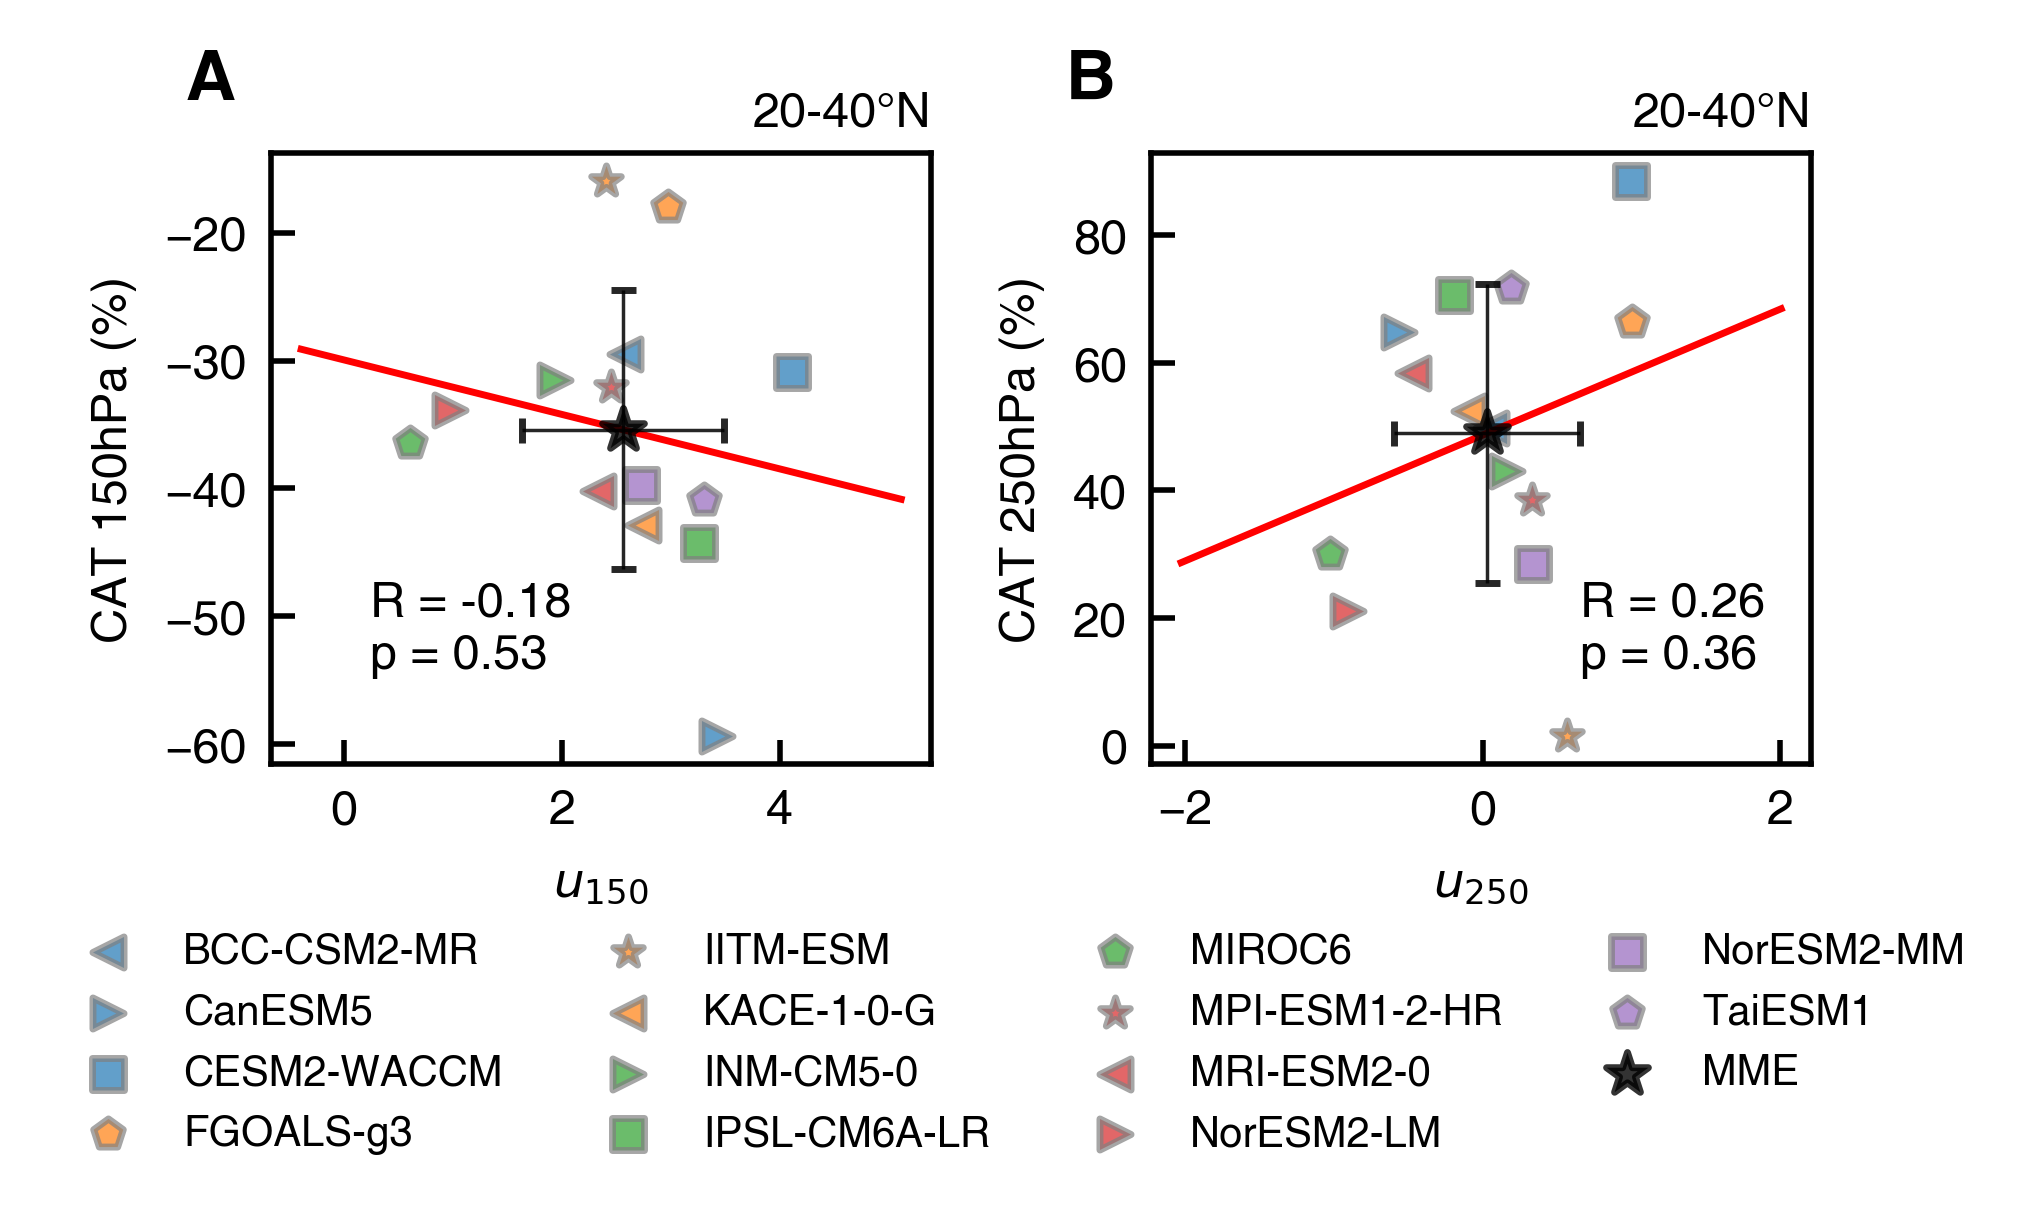

In [5]:
fig = plt.figure(figsize=(4, 2.6),dpi=500)
# 创建地图投影对象
axes = [[0.14,0.4,0.33,0.47], [0.58,0.4,0.33,0.47]]
#创建lat 和 file
file = f'/home/share-to-3/dongyl/cmip_day/interpolated_remapbiled_289x145/N_hemisphere/ua_ssp585_BCC-CSM2-MR_day_interpolated_289x145_N.nc'
lat = xr.open_dataset(file).lat.values
lat_indices = np.where((lat >= 10) & (lat <= 80))[0]
lat = xr.open_dataset(file).lat[lat_indices].values
lat2 = xr.open_dataset(file).lat
lon = xr.open_dataset(file).lon.values
########################################################################################
markers = ['<', '>', 's', 'p', '*']
colors = ['#1F77B4',  # 深蓝
    '#FF7F0E',  # 橙色
    '#2CA02C',  # 绿色
    '#D62728',  # 红色
    '#9467BD',  # 紫色
    '#8C564B',  # 棕色
    '#E377C2',  # 粉色
    '#7F7F7F']   # 灰色
def plot_corr_scatter(ax,x_data,y_data,title,sequence,xlabel,ylabel):
    #if sequence != 'd':
    # 线性回归分析
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
    extended_delta_u = np.linspace(min(x_data) - 1, max(x_data) + 1, 100)
    # 计算扩展范围内的回归值
    extended_line = slope * extended_delta_u + intercept
    ax.plot(extended_delta_u, extended_line, color='red', linewidth=1)

    # 绘制散点图
    for m in range(14):
        color_idx = m // 3  # Change color every 5 models
        marker_idx = m % len(markers)  # Cycle through markers
        ax.scatter(x_data[m], y_data[m], s=20, marker=markers[marker_idx],
                   color=colors[color_idx], label=models_list[m], alpha=0.7,edgecolors='grey')

    # ===== MME 平均点 + 1σ 误差棒 =====
    x_mean = np.nanmean(x_data)
    y_mean = np.nanmean(y_data)
    # ddof=1 → 样本标准差（更常用）；若你想用总体标准差可改为 ddof=0
    x_std = np.nanstd(x_data, ddof=1)
    y_std = np.nanstd(y_data, ddof=1)

    # 先画误差棒（在星标之下，zorder更低），再画星标
    # 两方向的 1σ：xerr 表示横向长度，yerr 表示纵向长度
    ax.errorbar(x_mean, y_mean,
                xerr=x_std, yerr=y_std,
                fmt='none', ecolor='k', elinewidth=.5, capsize=1.8,
                alpha=0.85, zorder=19)
    ax.scatter(x_mean, y_mean, marker='*', s=40, color='k',
               zorder=20, label='MME', alpha=0.8)
    # 添加图例、标签和标题
    ax.set_ylabel(ylabel,fontsize=7)
    ax.set_xlabel(xlabel,fontsize=7)

    xy=(0.15,0.3)
    if sequence=="B":
        xy=(0.65,0.3)
    if p_value < 0.01:
        ax.annotate(f'R = {r_value:.2f}\np < 0.01', xy=xy, xycoords='axes fraction',
                   horizontalalignment='left', verticalalignment='top', fontsize=7)
    elif p_value < 0.05:
        ax.annotate(f'R = {r_value:.2f}\np < 0.05', xy=xy, xycoords='axes fraction',
                   horizontalalignment='left', verticalalignment='top', fontsize=7)
    else:
        ax.annotate(f'R = {r_value:.2f}\np = {p_value:.2f}', xy=xy, xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', fontsize=7)


    #ax.vlines(0, -2, 5, colors='grey', linestyles='--', linewidths=.5)
    #ax.hlines(0, -2, 12, colors='grey', linestyles='--',linewidths=.5)
    # 增大坐标轴标签和刻度的字体大小
    ax.tick_params(axis='both', which='major', direction='in',labelsize=7)#labelsize=7,
    # ax.set_title('Based on T', loc='left', fontsize=14)
    ax.set_title(title, loc='right',fontsize=7,pad=4)#, fontsize=7
    ax.text(-0.13, 1.17, sequence, transform=ax.transAxes, fontsize=10, fontweight='bold', va='top', ha='left')
    return ax

plot_corr_scatter(fig.add_axes(axes[0]), u_change_N20_40_150,combined_freq_new_N20_40_150/combined_TI_clim_N20_40_150*100,
                  '20-40°N','A',r'$u_{\text{150}}$','CAT 150hPa (%)')
ax=plot_corr_scatter(fig.add_axes(axes[1]), u_change_N20_40_250,combined_freq_new_N20_40_250/combined_TI_clim_N20_40_250*100,
                  '20-40°N','B',r'$u_{\text{250}}$','CAT 250hPa (%)')

plt.legend(fontsize=6, frameon=False,ncol=4,bbox_to_anchor=(-1.7, -0.7),loc='lower left')
plt.savefig('/home/dongyl/UPWARD_SHIFT_OF_JET_STREAM_DATAFILES/ScienceStyleFigures/Fig.S7.TI150_250_RELAchange_u150_u250_scatter_95p.png',format='png',dpi=300)
plt.savefig('/home/dongyl/UPWARD_SHIFT_OF_JET_STREAM_DATAFILES/ScienceStyleFigures/Fig.S7.TI150_250_RELAchange_u150_u250_scatter_95p.svg',format='svg',dpi=300)
plt.show()